In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
#x_train[1000]

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
#y_test

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_cat_train = to_categorical(y_train,10)

In [0]:
y_cat_test = to_categorical(y_test,10)

In [0]:
y_train[0]

array([6], dtype=uint8)

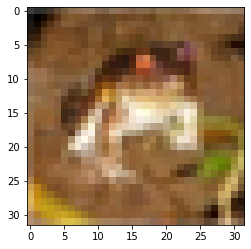

In [0]:
plt.imshow(x_train[0])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
32*32*3

3072

In [0]:
model = Sequential()

#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(32,32,3),activation='relu'))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [0]:
from tensorflow.keras.callbacks import EarlyStopping


In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5097 - accuracy: 0.4517 - val_loss: 1.3241 - val_accuracy: 0.5290
Epoch 2/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1890 - accuracy: 0.5795 - val_loss: 1.1448 - val_accuracy: 0.5990
Epoch 3/15
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0476 - accuracy: 0.6303 - val_loss: 1.1255 - val_accuracy: 0.6079
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9451 - accuracy: 0.6693 - val_loss: 1.0511 - val_accuracy: 0.6359
Epoch 5/15
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8573 - accuracy: 0.7013 - val_loss: 0.9990 - val_accuracy: 0.6631
Epoch 6/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7839 - accuracy: 0.7268 - val_loss: 0.9826 - val_accuracy: 0.6745
Epoch 7/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7194 - accuracy: 0.7471 - val_loss: 0.9701 -

In [0]:
metrics = pd.DataFrame(model.history.history)

In [0]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

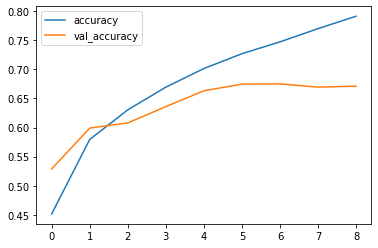

In [0]:
metrics[['accuracy','val_accuracy']].plot()

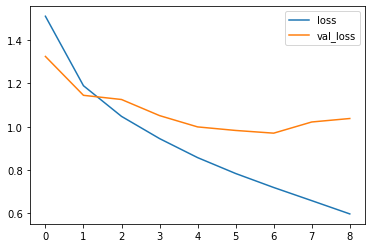

In [0]:
metrics[['loss','val_loss']].plot()

In [0]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0377142429351807, 0.6710000038146973]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.81      0.77      0.79      1000
           2       0.61      0.43      0.50      1000
           3       0.55      0.39      0.45      1000
           4       0.50      0.78      0.61      1000
           5       0.65      0.51      0.57      1000
           6       0.71      0.79      0.75      1000
           7       0.76      0.69      0.73      1000
           8       0.72      0.83      0.77      1000
           9       0.71      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



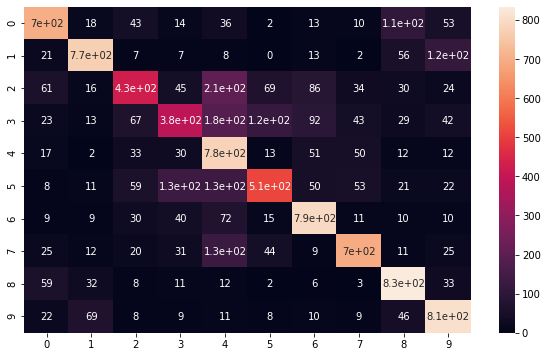

In [0]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


In [0]:
my_image = x_test[16]

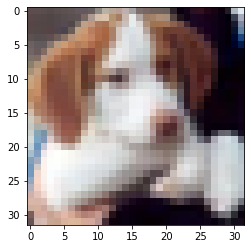

In [0]:
plt.imshow(my_image)

In [0]:
y_test[15]

array([8], dtype=uint8)

In [0]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5])